In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU

Using TensorFlow backend.


In [2]:
# Read Data
train_data = pd.read_csv("../data/train_data.csv")
train_set = train_data.iloc[:,2:].values


In [3]:
# Normalize data - makes more sense than standardization
sc = MinMaxScaler()
train_set_sc = sc.fit_transform(train_set)
num_samples = train_set_sc.shape[0]
num_features = train_set_sc.shape[1]

In [16]:
# Formulate the time based data
timesteps = 10 # Hyperparameter
X_train = []
y_train = []
for i in range(timesteps, num_samples-1):
    X_train.append(train_set_sc[i-timesteps:i])
    y_train.append(train_set_sc[i+1, 6])
X_train, y_train  = np.array(X_train), np.array(y_train)
print (X_train.shape)

(2090, 10, 7)


In [17]:
regressor = Sequential()
regressor.add(GRU(units=100, return_sequences=True, input_shape=(timesteps, num_features)))
regressor.add(Dropout(0.2))
regressor.add(GRU(units=100, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(GRU(units=100, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(GRU(units=100, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
2090/2090 [==============================] - 5s 2ms/step - loss: 0.0241
Epoch 2/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 0.0046
Epoch 3/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 0.0039
Epoch 4/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 0.0038
Epoch 5/1000
2090/2090 [==============================] - 3s 1ms/step - loss: 0.0033
Epoch 6/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 0.0033
Epoch 7/1000
2090/2090 [==============================] - 3s 1ms/step - loss: 0.0032
Epoch 8/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 0.0031
Epoch 9/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 0.0034
Epoch 10/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 0.0030
Epoch 11/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 0.0026
Epoch 12/1000
2090/2090 [==============================] - 2s 1

2090/2090 [==============================] - 2s 1ms/step - loss: 0.0011
Epoch 97/1000
2090/2090 [==============================] - 2s 893us/step - loss: 9.8252e-04
Epoch 98/1000
2090/2090 [==============================] - 2s 908us/step - loss: 9.7978e-04
Epoch 99/1000
2090/2090 [==============================] - 3s 1ms/step - loss: 0.0010
Epoch 100/1000
2090/2090 [==============================] - 2s 875us/step - loss: 0.0011
Epoch 101/1000
2090/2090 [==============================] - 2s 855us/step - loss: 9.8438e-04
Epoch 102/1000
2090/2090 [==============================] - 2s 858us/step - loss: 0.0010
Epoch 103/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 9.9190e-04
Epoch 104/1000
2090/2090 [==============================] - 3s 1ms/step - loss: 0.0010
Epoch 105/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 9.4253e-04
Epoch 106/1000
2090/2090 [==============================] - 3s 1ms/step - loss: 9.5673e-04
Epoch 107/1000
2090/2090 [=

2090/2090 [==============================] - 2s 953us/step - loss: 7.9747e-04
Epoch 186/1000
2090/2090 [==============================] - 3s 1ms/step - loss: 7.9285e-04
Epoch 187/1000
2090/2090 [==============================] - 2s 867us/step - loss: 7.8461e-04
Epoch 188/1000
2090/2090 [==============================] - 2s 857us/step - loss: 7.8709e-04
Epoch 189/1000
2090/2090 [==============================] - 2s 876us/step - loss: 6.9959e-04
Epoch 190/1000
2090/2090 [==============================] - 2s 859us/step - loss: 7.4857e-04
Epoch 191/1000
2090/2090 [==============================] - 2s 885us/step - loss: 7.1497e-04 0s - loss: 7.1380e-0
Epoch 192/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.9617e-04
Epoch 193/1000
2090/2090 [==============================] - 3s 2ms/step - loss: 7.8064e-04
Epoch 194/1000
2090/2090 [==============================] - 2s 948us/step - loss: 8.3100e-04
Epoch 195/1000
2090/2090 [==============================] - 2s 863us/s

2090/2090 [==============================] - 2s 1ms/step - loss: 5.9532e-04
Epoch 275/1000
2090/2090 [==============================] - 2s 985us/step - loss: 6.8186e-04
Epoch 276/1000
2090/2090 [==============================] - 2s 986us/step - loss: 6.8759e-04
Epoch 277/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.7457e-04
Epoch 278/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.7391e-04
Epoch 279/1000
2090/2090 [==============================] - 2s 983us/step - loss: 6.6743e-04
Epoch 280/1000
2090/2090 [==============================] - 2s 992us/step - loss: 6.6206e-04
Epoch 281/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 7.2645e-04
Epoch 282/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 7.0985e-04
Epoch 283/1000
2090/2090 [==============================] - 2s 994us/step - loss: 6.6541e-04
Epoch 284/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 7.2622e-04
Epoc

2090/2090 [==============================] - 2s 1ms/step - loss: 6.3542e-04
Epoch 365/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.4458e-04
Epoch 366/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.9262e-04
Epoch 367/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.1943e-04
Epoch 368/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.2723e-04
Epoch 369/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.4151e-04
Epoch 370/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.4145e-04
Epoch 371/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.4789e-04
Epoch 372/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.6591e-04
Epoch 373/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.6213e-04
Epoch 374/1000
2090/2090 [==============================] - 2s 992us/step - loss: 6.1787e-04
Epoch 375/10

2090/2090 [==============================] - 2s 991us/step - loss: 6.3936e-04
Epoch 455/1000
2090/2090 [==============================] - 2s 986us/step - loss: 6.1884e-04
Epoch 456/1000
2090/2090 [==============================] - 2s 989us/step - loss: 6.4738e-04
Epoch 457/1000
2090/2090 [==============================] - 2s 982us/step - loss: 6.3234e-04
Epoch 458/1000
2090/2090 [==============================] - 2s 989us/step - loss: 5.9189e-04
Epoch 459/1000
2090/2090 [==============================] - 2s 988us/step - loss: 6.0702e-04
Epoch 460/1000
2090/2090 [==============================] - 2s 988us/step - loss: 5.5552e-04
Epoch 461/1000
2090/2090 [==============================] - 2s 993us/step - loss: 5.6771e-04
Epoch 462/1000
2090/2090 [==============================] - 2s 980us/step - loss: 5.9715e-04
Epoch 463/1000
2090/2090 [==============================] - 2s 993us/step - loss: 6.6668e-04
Epoch 464/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.143

2090/2090 [==============================] - 2s 1ms/step - loss: 5.7749e-04
Epoch 544/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.5513e-04
Epoch 545/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.7810e-04
Epoch 546/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.0385e-04
Epoch 547/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.6917e-04
Epoch 548/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.9686e-04
Epoch 549/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.8781e-04
Epoch 550/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.5182e-04
Epoch 551/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.0300e-04
Epoch 552/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.1974e-04
Epoch 553/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 6.3464e-04
Epoch 554/1000

2090/2090 [==============================] - 2s 989us/step - loss: 5.2159e-04
Epoch 634/1000
2090/2090 [==============================] - 2s 973us/step - loss: 5.3422e-04
Epoch 635/1000
2090/2090 [==============================] - 2s 984us/step - loss: 5.7271e-04
Epoch 636/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.5143e-04
Epoch 637/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.2952e-04
Epoch 638/1000
2090/2090 [==============================] - 2s 981us/step - loss: 5.8174e-04
Epoch 639/1000
2090/2090 [==============================] - 2s 986us/step - loss: 5.3199e-04
Epoch 640/1000
2090/2090 [==============================] - 2s 989us/step - loss: 5.2930e-04
Epoch 641/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.4638e-04
Epoch 642/1000
2090/2090 [==============================] - 2s 990us/step - loss: 5.4364e-04
Epoch 643/1000
2090/2090 [==============================] - 2s 997us/step - loss: 5.8956e-0

2090/2090 [==============================] - 2s 998us/step - loss: 5.7534e-04
Epoch 723/1000
2090/2090 [==============================] - 2s 982us/step - loss: 5.9843e-04
Epoch 724/1000
2090/2090 [==============================] - 2s 979us/step - loss: 5.0247e-04
Epoch 725/1000
2090/2090 [==============================] - 2s 990us/step - loss: 5.6633e-04
Epoch 726/1000
2090/2090 [==============================] - 2s 995us/step - loss: 6.0927e-04
Epoch 727/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.2349e-04
Epoch 728/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.3161e-04
Epoch 729/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.4030e-04
Epoch 730/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.2357e-04
Epoch 731/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.2325e-04
Epoch 732/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.1488e-04
Epoc

2090/2090 [==============================] - 2s 996us/step - loss: 5.3690e-04
Epoch 813/1000
2090/2090 [==============================] - 2s 985us/step - loss: 5.1047e-04
Epoch 814/1000
2090/2090 [==============================] - 2s 991us/step - loss: 4.9772e-04
Epoch 815/1000
2090/2090 [==============================] - 2s 990us/step - loss: 4.9935e-04
Epoch 816/1000
2090/2090 [==============================] - 2s 988us/step - loss: 5.8807e-04
Epoch 817/1000
2090/2090 [==============================] - 2s 984us/step - loss: 5.5726e-04
Epoch 818/1000
2090/2090 [==============================] - 2s 988us/step - loss: 5.1132e-04
Epoch 819/1000
2090/2090 [==============================] - 2s 991us/step - loss: 5.3478e-04
Epoch 820/1000
2090/2090 [==============================] - 2s 999us/step - loss: 5.1847e-04
Epoch 821/1000
2090/2090 [==============================] - 2s 993us/step - loss: 5.1960e-04
Epoch 822/1000
2090/2090 [==============================] - 2s 993us/step - loss: 5.3

2090/2090 [==============================] - 2s 995us/step - loss: 5.1426e-04
Epoch 902/1000
2090/2090 [==============================] - 2s 994us/step - loss: 4.9900e-04
Epoch 903/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.1426e-04
Epoch 904/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.2923e-04
Epoch 905/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 4.7739e-04
Epoch 906/1000
2090/2090 [==============================] - 2s 986us/step - loss: 4.8291e-04
Epoch 907/1000
2090/2090 [==============================] - 2s 998us/step - loss: 5.9254e-04
Epoch 908/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.2698e-04
Epoch 909/1000
2090/2090 [==============================] - 2s 990us/step - loss: 4.7701e-04
Epoch 910/1000
2090/2090 [==============================] - 2s 996us/step - loss: 4.8146e-04
Epoch 911/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 4.9216e-04
Ep

2090/2090 [==============================] - 2s 1ms/step - loss: 5.0052e-04
Epoch 992/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 4.9422e-04
Epoch 993/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.0289e-04
Epoch 994/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 5.2883e-04
Epoch 995/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 4.5096e-04
Epoch 996/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 4.7501e-04
Epoch 997/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 4.7974e-04
Epoch 998/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 4.7966e-04
Epoch 999/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 4.6925e-04
Epoch 1000/1000
2090/2090 [==============================] - 2s 1ms/step - loss: 4.7904e-04


In [18]:
# Load the Test data
test_data = pd.read_csv("../data/test_data.csv")
test_set = test_data.iloc[:,8].values

full_data = pd.concat((train_data, test_data), axis=0)
inputs = full_data[len(full_data) - len(test_data) - timesteps:].iloc[:, 2:].values

In [19]:
# Create test set and call the predict function
inputs = sc.transform(inputs)
num_test_samples = inputs.shape[0]
X_test = []
for i in range(timesteps, num_test_samples):
    X_test.append(inputs[i-timesteps:i])
X_test = np.array(X_test)

y_pred = regressor.predict(X_test)

In [20]:
# Un-scale the outputs
xmin = sc.data_min_[6]
xmax = sc.data_max_[6]
for i in range(y_pred.shape[0]):
    y_pred[i][0] = y_pred[i][0] * (xmax-xmin) + xmin

In [21]:
print (test_set)
print (y_pred)

[64.52  64.38  64.36  64.53  64.57  64.48  64.355 64.41  64.46  64.34
 64.08  64.21  64.06  64.115 64.02  64.02  64.02  64.05  64.12  64.08
 63.84 ]
[[64.72444 ]
 [64.762184]
 [64.732925]
 [64.674644]
 [64.663864]
 [64.69313 ]
 [64.65529 ]
 [64.560036]
 [64.5081  ]
 [64.5261  ]
 [64.48762 ]
 [64.317635]
 [64.325005]
 [64.300995]
 [64.32044 ]
 [64.27854 ]
 [64.24728 ]
 [64.275444]
 [64.28353 ]
 [64.32076 ]
 [64.31311 ]]


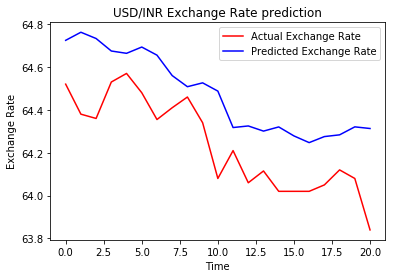

In [22]:
# Plot actual vs predicted
plt.plot(test_set, color='red', label='Actual Exchange Rate')
plt.plot(y_pred, color='blue', label='Predicted Exchange Rate')
plt.title("USD/INR Exchange Rate prediction")
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [11]:
y_test = [64.52,64.38,64.36,64.53,64.57,64.48,64.355,64.41,64.46,64.34,64.08,64.21,64.06,64.115,64.02,64.02,64.02,64.05,64.12,64.08,63.84]
y_pred = [64.716225,64.7756 ,64.659004,64.61536 ,64.65717 ,64.710365,64.67742 ,64.55419 ,64.52477 ,64.57062 ,64.54591 ,64.30956 ,64.38043 ,64.28668 ,64.38597 ,64.244606,64.27599 ,64.25985 ,64.28404 ,64.371445,64.39242]

In [23]:
from sklearn.metrics import mean_squared_error

print (mean_squared_error(test_set, y_pred))

0.06678155638840362


In [24]:
from math import sqrt
print (sqrt(0.06678155638840362))

0.2584212769653529
